# 分类例子

## 决策树分类

决策树是一种树形结构 ，用于为决策提供依据。决策树的每一个节点都是可以用是或否来回答的问题，节点的分支表示一次选择（是或否），每片树叶代表一个决策。

In [1]:
###不显示警告信息
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_wine # 导入葡萄酒数据集模块
from sklearn import tree # 导入决策树子模块
from sklearn.model_selection import train_test_split as tsplit
from sklearn.metrics import classification_report

X, y = load_wine(return_X_y=True) # 获取葡萄酒数据集和分类标签集


D:\anaconda\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
D:\anaconda\lib\site-packages\sklearn\datasets\base.py:242: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional inf

In [2]:
X.shape

(178, 13)

In [3]:
x_train, x_test, y_train, y_test = tsplit(X, y, test_size=0.1)


In [4]:
x_test.shape

(18, 13)

In [5]:
x_train.shape

(160, 13)

In [6]:
m = tree.DecisionTreeClassifier() # 实例化决策树分类器
m.fit(x_train, y_train)



D:\anaconda\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
precision = m.score(x_test, y_test)
print('测试集分类准确率：%0.2f'%precision)

y_pred = m.predict(x_test)
report = classification_report(y_test, y_pred)
print('测试集分类结果报告：\n', report)

测试集分类准确率：1.00
测试集分类结果报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



## 独立成分分析（ICA）

房间里有两位演讲者在讲话，他们发出的声音分别是s1和s2，有两台录音设备记录了他们混合在一起的声音，得到的记录是X1和x2。
如何能够从录音数据x1和x2中分离出两位演讲者各自独立的讲话声音s1和s2？

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

plt.rcParams['font.sans-serif'] = ['FangSong']
plt.rcParams['axes.unicode_minus'] = False



D:\anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
D:\anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
D:\anaconda\lib\site-pa

In [9]:
# 用正弦波和三角波表示两位演讲者的声音s_1和s_2，两个合成信号x_1和x_2表示两台录音设备的记录数据

_x = np.linspace(0, 8*np.pi, 1000)
k1 = np.where(np.int_(0.5*_x/np.pi)%2==0, 1, -1)/np.pi
k2 = np.where(np.int_(_x/np.pi)%2==0, 1, 0)
k3 = np.where(np.int_(_x/np.pi)%2==0, 0, 1)

s1 = np.sin(_x) # 第1位演讲者的声音
s2 = _x%(np.pi)*k1*k2 + (np.pi-_x%(np.pi))*k1*k3 # 第2位演讲者的声音
x1 = 0.4*s1 + 0.5*s2 # 录音1
x2 = 1.2*s1 - 0.3*s2 # 录音2



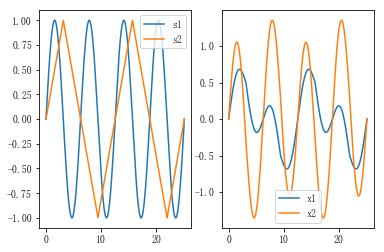

In [10]:
plt.subplot(121)
plt.plot(_x, s1, label='s1')
plt.plot(_x, s2, label='s2')
plt.legend()
plt.subplot(122)
plt.plot(_x, x1, label='x1')
plt.plot(_x, x2, label='x2')
plt.legend()
plt.show()



(1000, 2)


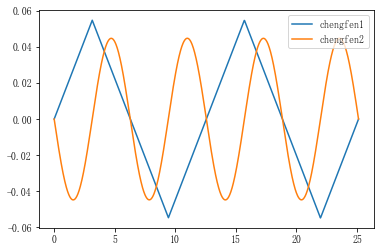

In [11]:
# 从合成信号x_1和x_2中分离出s_1和s_2这样的独立音源

X = np.stack((x1,x2), axis=1) # 将两个信号合并成矩阵

fica = FastICA(n_components=2) # 快速独立成分分析类实例化
fica.fit(X)

X_ica = fica.transform(X) # 独立成分分析结果
print(X_ica.shape) # (1000, 2)

# plt.plot(_x, X_ica[:,0], label='独立成分1')
# plt.plot(_x, X_ica[:,1], label='独立成分2')
plt.plot(_x, X_ica[:,0], label='chengfen1')
plt.plot(_x, X_ica[:,1], label='chengfen2')
plt.legend()
plt.show()